In [6]:
import numpy as np

def getdiff(y):
    # Differentiate y to get gaussian beam
    # Called by getprofile
    if y[len(y)-1] < y[0]: y = y[::-1]
    ygauss = np.gradient(y)
    xgauss = np.arange(len(ygauss)) # x-scale depends on steps between measurements
    return xgauss,ygauss

def gaussianfit(x,y,*p0):
    from scipy.optimize import curve_fit
    # Calculate gaussian fit to y
    # Called by getprofile
    # Define gaussian fit function
    def gauss(x, *p):
        A, mu, sigma, y0 = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + y0
    # Define first attempt parameters from data
    A0 = np.max(y)
    mu0 = x[int(np.floor(len(x)/2))]
    sigma0 = abs(x[len(x)-1]-x[0])/4
    y0 = y[0]
    p0 = [A0, mu0, sigma0, y0]
    # Run fit
    coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)
    yfit = gauss(x, *coeff)
    return coeff, yfit

def getprofile(y,mm = 1):
    # Calculate the gaussian fit to the beam profile from integrated razor blade power measurement
    # Differentiate 
    xgauss,ygauss = getdiff(y)
    # Rescale x-axis if desired
    # Plot displays as though x-axis is mm
    xgauss = xgauss*mm
    # Fit the data to a gaussian profile
    coeff, yfit = gaussianfit(xgauss,ygauss)
    FWHM = coeff[2]*2.35
    print('Full-Width-Half-Max, FWHM = {0:.2f} mm'.format(FWHM))
    print('')
    print('A = {0:.2f}, x0 = {1:.2f} mm, sigma = {2:.2f} mm, y0 = {3:.2f}'.format(coeff[0], 
                                                                                  coeff[1], coeff[2], coeff[3]))
    print('A*exp(-(x-x0)^2/(2*sigma^2)) + y0')
    return xgauss, ygauss, yfit, coeff

def plotprofile(x,y,yfit):
    # Plot the beam profile (differentiated data) with gaussian fit
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(x, y,'d',label='Beam Profile')
    plt.plot(x, yfit, '--',label='Gaussian Fit')
    plt.xlabel('Width (mm)')
    plt.ylabel('Amplitude (arb)')
    plt.legend()
    plt.show()

Full-Width-Half-Max, FWHM = 5.66 mm

A = 0.18, x0 = 6.41 mm, sigma = 2.41 mm, y0 = -0.00
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


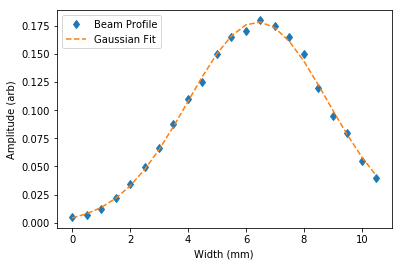

In [9]:
# Example profile

# Record power meter readings at each razor blade position:
ydata = np.array([2.05,2.01,1.94,1.85,1.75,1.61,1.45,1.28,1.10,0.92,0.76,0.59,0.46,0.34,0.24,0.165,0.108,
                  0.066,0.039,0.023,0.014,0.009])

# Get beam profile and gaussian fit:
#   Note: Plot axes assume data points are spaced by 1 mm translation of the razor blade. To scale x-axis,
#         define a multiplier for the x-axis (spacing)
spacing = 0.5 # Data measured every 0.5 mm
xgauss, ygauss, yfit, coeff = getprofile(ydata,spacing)

# Plot the profle:
plotprofile(xgauss,ygauss,yfit)

# Jupyter help: To run each cell, click on the cell and then hit Control+Enter, or use the run button above.
#               Remember to run the first cell, containing the functions, before running your measurement cell.